In [1]:
! pip install tensorflow opencv-python matplotlib

                                              0.0/38.1 MB ? eta -:--:--
                                              0.1/38.1 MB 1.3 MB/s eta 0:00:30
                                              0.4/38.1 MB 4.2 MB/s eta 0:00:09
     -                                        1.8/38.1 MB 12.4 MB/s eta 0:00:03
     -----                                    5.5/38.1 MB 29.0 MB/s eta 0:00:02
     ----------                              10.3/38.1 MB 50.1 MB/s eta 0:00:01
     ---------------                        15.2/38.1 MB 108.8 MB/s eta 0:00:01
     -----------------                       17.1/38.1 MB 81.8 MB/s eta 0:00:01
     ------------------------                24.1/38.1 MB 93.9 MB/s eta 0:00:01
     ----------------------------           28.8/38.1 MB 108.8 MB/s eta 0:00:01
     ---------------------------------      34.0/38.1 MB 108.8 MB/s eta 0:00:01
     -------------------------------------  38.1/38.1 MB 108.8 MB/s eta 0:00:01
     --------------------------------------- 38.1/

In [3]:
import tensorflow as tf
import os

In [4]:
from matplotlib import pyplot as plt

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [6]:
data = tf.keras.preprocessing.image_dataset_from_directory('old group/algae_dataset')

Found 2197 files belonging to 5 classes.


In [9]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

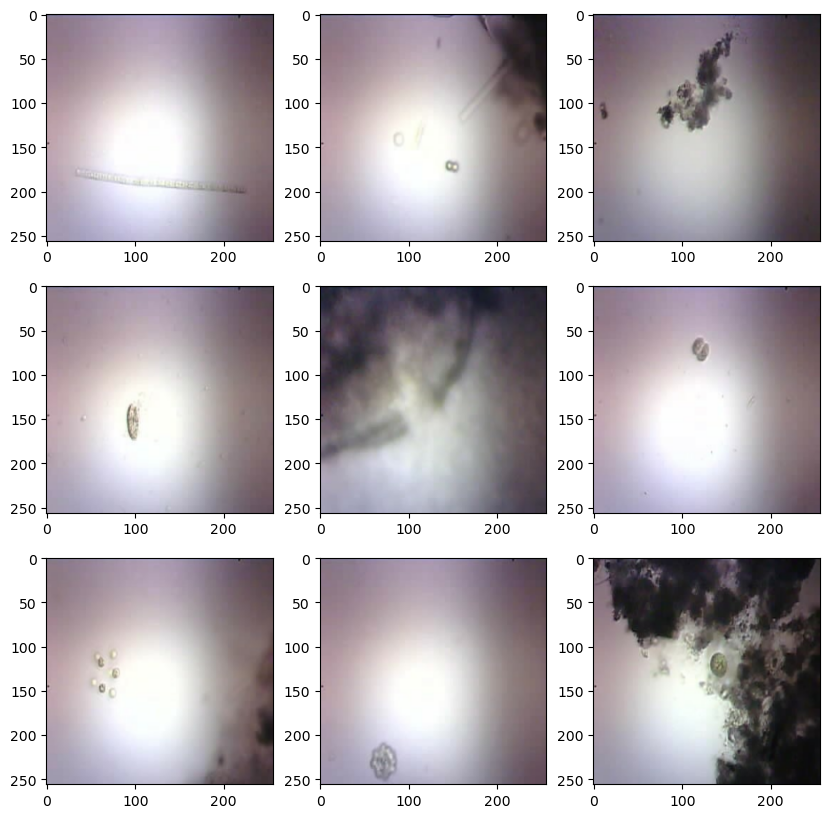

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
	plt.subplot(3, 3, i + 1)
	plt.imshow(batch[0][i].astype("uint8"))

In [11]:
# transform all data to be the same size
data = data.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))


In [12]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

print(train_size, val_size, test_size)

55 6 6


In [13]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size + test_size).take(val_size)

In [24]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 28, 28, 64)       

In [26]:
# SparseCategoricalCrossentropy when there are two or more label classes

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(train, validation_data=val, epochs=10)

Epoch 1/10


55/55 [==============================] - 15s 265ms/step - loss: 68.6079 - accuracy: 0.3739 - val_loss: 1.2394 - val_accuracy: 0.5156
Epoch 2/10
55/55 [==============================] - 14s 256ms/step - loss: 1.3249 - accuracy: 0.4261 - val_loss: 1.2571 - val_accuracy: 0.4271
Epoch 3/10
55/55 [==============================] - 15s 266ms/step - loss: 1.1990 - accuracy: 0.4858 - val_loss: 1.1562 - val_accuracy: 0.5156
Epoch 4/10
55/55 [==============================] - 14s 257ms/step - loss: 1.0561 - accuracy: 0.5750 - val_loss: 0.9868 - val_accuracy: 0.6198
Epoch 5/10
55/55 [==============================] - 15s 260ms/step - loss: 0.8669 - accuracy: 0.6489 - val_loss: 0.9607 - val_accuracy: 0.6198
Epoch 6/10
55/55 [==============================] - 16s 278ms/step - loss: 0.9649 - accuracy: 0.6080 - val_loss: 0.9459 - val_accuracy: 0.5990
Epoch 7/10
55/55 [==============================] - 15s 262ms/step - loss: 0.7981 - accuracy: 0.6858 - val_loss: 0.6775 - val_accuracy: 0.7344
Epoch 8/1